In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [ ]:
import pandas as pd

df = pd.read_csv('data.csv', encoding='latin1')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Sales & Customer Behavior Analysis

### Dataset Overview

In [ ]:
# Basic info about the dataset
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


### Data Cleaning

In [ ]:

missing_percent = df.isnull().sum() / len(df) * 100
print("Missing Values Percentage:\n", missing_percent)

Missing Values Percentage:
 InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


In [ ]:
df['Description'] = df['Description'].fillna('Unknown Product')

In [ ]:
df['CustomerID'] = df['CustomerID'].fillna(0).astype(int)

In [ ]:
# Convert 'InvoiceDate' to datetime format for better analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create new columns for Year, Month, Day, and Hour to enable time-based analysis
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [ ]:
print("Rows with zero or negative Quantity:", df[df['Quantity'] <= 0].shape[0])

print("Rows with zero or negative UnitPrice:", df[df['UnitPrice'] <= 0].shape[0])

Rows with zero or negative Quantity: 10624
Rows with zero or negative UnitPrice: 2517


In [ ]:
df = df[df['UnitPrice'] > 0]

In [ ]:
# Find duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows in the dataset: {duplicate_count}")

# now remove them
df = df.drop_duplicates()

Duplicate rows in the dataset: 0


In [ ]:
#now making one last thing - Total Price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
#Dataset is now cleaned, so just save and download the cleaned data
df.to_csv('cleaned_sales_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('cleaned_sales_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###  Exploratory Data Analysis (EDA)

So far we have cleaned and downloaded the final dataset on which, we'll perform EDA. But before this, we need to decide what are the key questions that is supposed to be answer(or possible with this dataset), for eg-
1. How have sales evolved over time?
2. Which products contribute most to revenue?
3. Which customers or regions are most valuable?
4. Are there seasonal trends or patterns by month or hour?
5. What anomalies or interesting behavior can we detect?

###1.First Analysis: **Monthly Sales Trend**
  
  a) it helps businesses identify peak and low seasons
  
  b) it informs inventory planning and marketing campaigns
  
  c) it shows patterns that could impact business decisions



In [ ]:
# Group data by Year and Month, summing the TotalPrice for each group
monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

# Sort by Year and Month to keep the time sequence correct
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month'])

# Display the result
monthly_sales.head()

,Year,Month,TotalPrice
0,2010,12,746723.610
1,2011,1,558448.560
2,2011,2,497026.410
3,2011,3,682013.980
4,2011,4,492367.841


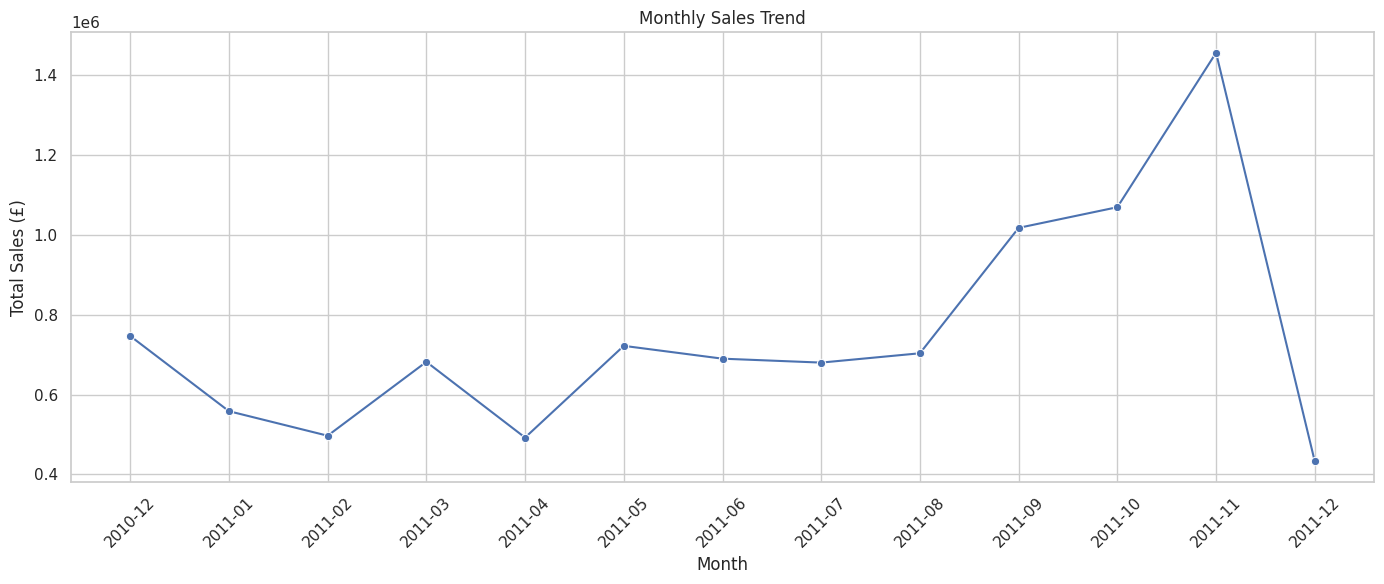

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better readability
sns.set(style="whitegrid")

# Create a new column 'Year-Month' for plotting
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

# Plotting the monthly sales
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='TotalPrice', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.tight_layout()
plt.show()

## Monthly Sales Trend

 Observations:
- Certain months show higher sales, possibly due to seasonal demand.
- This insight can help businesses plan promotions and inventory better.


###2. Exploring Top Products by Revenue


In [ ]:
# First Group by 'Description' and sum the TotalPrice, then displaying it
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()

top_products

,Description,TotalPrice
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164459.49
2,WHITE HANGING HEART T-LIGHT HOLDER,99612.42
3,PARTY BUNTING,98243.88
4,JUMBO BAG RED RETROSPOT,92175.79
5,RABBIT NIGHT LIGHT,66661.63
6,POSTAGE,66230.64
7,PAPER CHAIN KIT 50'S CHRISTMAS,63715.24
8,ASSORTED COLOUR BIRD ORNAMENT,58792.42
9,CHILLI LIGHTS,53746.66


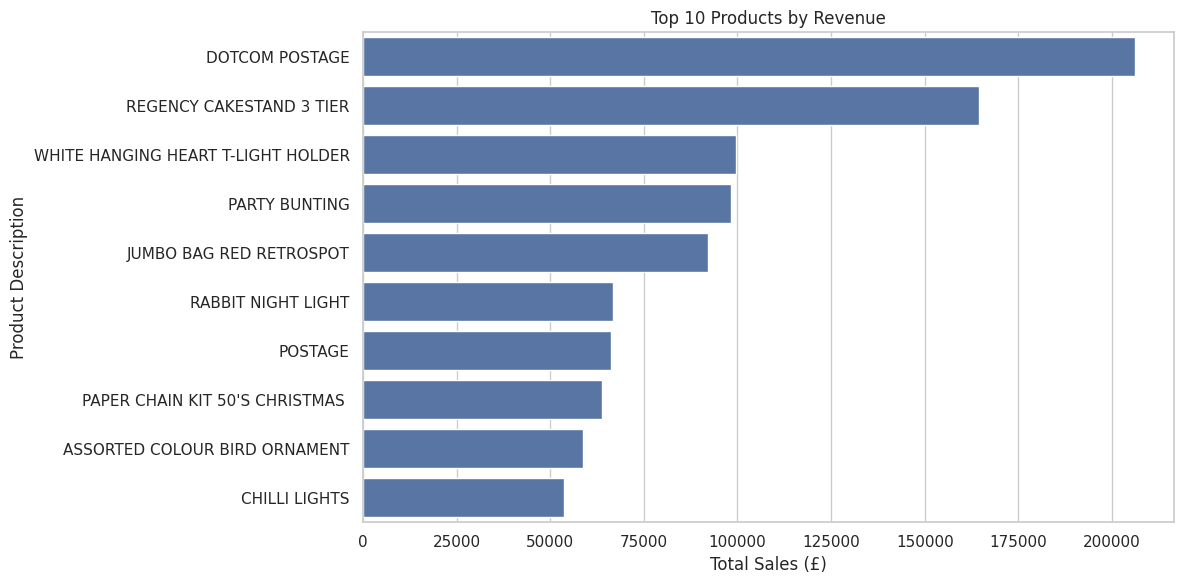

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_products, x='TotalPrice', y='Description')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Sales (£)')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

##  Top 10 Products by Revenue

- Aggregated total sales by product description and sorted them to find the highest contributors.

- Visualized the top 10 products to highlight the most valuable items in the catalog.

- **This analysis provides insight into product demand and helps prioritize inventory and promotions.**

### 3. Explore Customer Distribution

> Add blockquote




In [ ]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()

top_customers

,CustomerID,TotalPrice
0,0,1469611.65
1,14646,279489.02
2,18102,256438.49
3,17450,187322.17
4,14911,132458.73
5,12415,123725.45
6,14156,113214.59
7,17511,88125.38
8,16684,65892.08
9,13694,62690.54


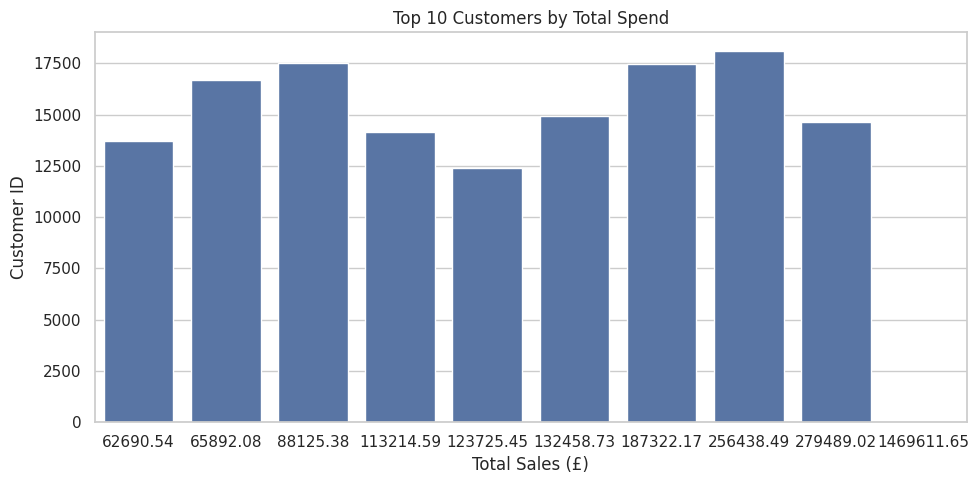

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_customers, x='TotalPrice', y='CustomerID')
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('Total Sales (£)')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

##  Top 10 Customers by Total Spend

- Grouped sales by customer ID and identified those contributing most to revenue.

- Visualizing customer behavior to help businesses focus on high-value relationships.

- This insight supports customer retention strategies and targeted marketing.

### 4.Explore Regional Sales By Country


In [ ]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

# Display top countries by sales
country_sales.head()

,Country,TotalPrice
0,United Kingdom,8189252.304
1,Netherlands,284661.540
2,EIRE,262993.380
3,Germany,221509.470
4,France,197317.110


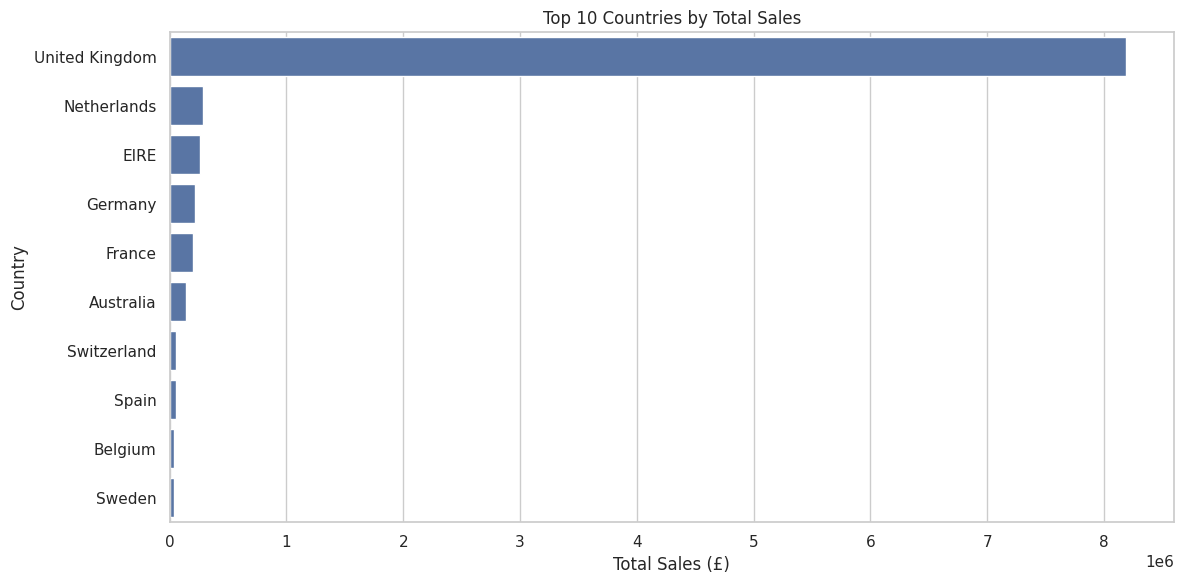

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=country_sales.head(10), x='TotalPrice', y='Country')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales (£)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

##Regional Sales Analysis


- Understanding regional patterns helps businesses optimize market-specific strategies and promotions.

- This analysis provides actionable insights for expansion and customer support planning.

###4. Sales by Day


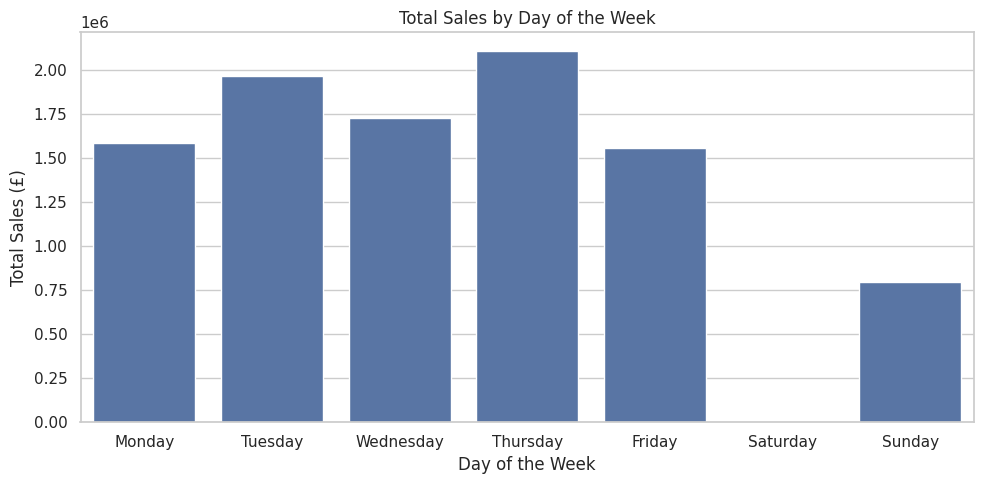

In [ ]:
# Firstly Extract day of the week from InvoiceDate
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Group by DayOfWeek and sum sales
weekday_sales = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

#Plot
plt.figure(figsize=(10,5))
sns.barplot(data=weekday_sales, x='DayOfWeek', y='TotalPrice')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (£)')
plt.tight_layout()
plt.show()

## Sales by Day of the Week

- Extracted the day from transaction dates then analyzed total sales by weekday.

- We can observe the patterns that could help businesses plan staffing, promotions, or operational hours based on demand.

###5. Analysing Returns - Negative Quantity


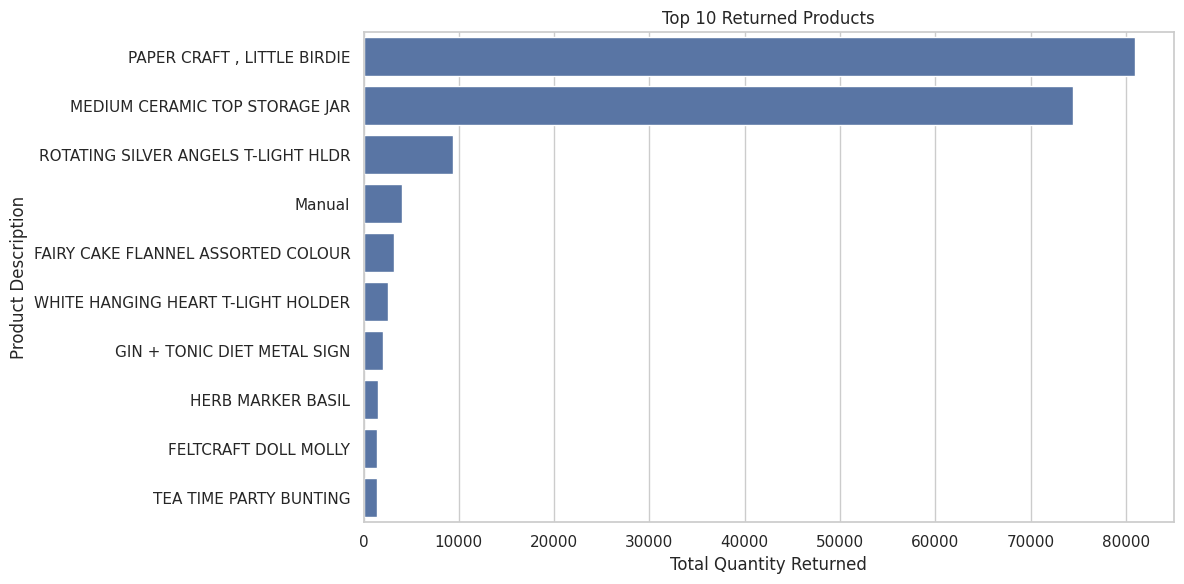

In [ ]:
#Filter rows where Quantity is negative (returns)
returns = df[df['Quantity'] < 0]

#Group by Description to see which products are returned most
top_returns = returns.groupby('Description')['Quantity'].sum().abs().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_returns, x='Quantity', y='Description')
plt.title('Top 10 Returned Products')
plt.xlabel('Total Quantity Returned')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

## Return Analysis
- Analyzed the top 10 products by quantity returned to highlight potential issues in product quality or customer satisfaction.

- This insight is useful for product improvement and customer service.

### Data Visualization

### Insights & Recommendations